In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2010-01-01'
end = '2022-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  25 of 25 completed


In [2]:
# Calculating  Daily returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,1.1807%,3.2752%,-0.6862%,-1.5606%,-1.3553%,-0.7576%,0.1771%,-0.3746%,0.4195%,-0.4963%,...,-0.2579%,1.8028%,0.8236%,-1.0445%,-0.4898%,0.3708%,0.3368%,-1.8908%,0.1803%,3.5259%
2010-01-06,1.5683%,3.0335%,0.3455%,-0.0397%,-0.7168%,-0.9715%,-1.1199%,-0.2686%,-0.9303%,-0.3325%,...,-1.1635%,1.3147%,-0.6065%,-1.9275%,-0.9824%,1.9085%,0.9442%,3.4797%,-2.8754%,8.6957%
2010-01-07,-1.5165%,4.0482%,1.6182%,0.0793%,2.1059%,0.9811%,-1.5201%,0.7181%,0.0383%,0.7229%,...,-1.2427%,1.3242%,-0.1370%,1.0295%,-1.1228%,1.2283%,0.0000%,4.4491%,-0.5952%,11.2000%
2010-01-08,-0.5227%,-0.9646%,0.2372%,-1.6641%,-0.2946%,-1.1798%,-0.6356%,2.7273%,0.7472%,0.3312%,...,-0.5298%,0.1307%,-1.8206%,0.4168%,-0.7326%,-0.3978%,1.6836%,0.9410%,0.0630%,-1.6187%
2010-01-11,0.3002%,-1.1851%,-0.5746%,1.0476%,-0.6501%,0.7023%,0.3046%,4.0257%,-0.3043%,2.5860%,...,1.2650%,1.6445%,0.6859%,-0.0462%,-0.4797%,0.2197%,1.1856%,5.3484%,0.4094%,0.6094%


In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.


port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
#rm = 'MV' # Risk measure used, this time will be variance
rm = 'SLPM' # Risk measure used, Second Lower Partial Moment (Sortino Ratio).
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,4.7764%,0.0000%,0.0000%,0.0000%,5.9003%,0.0000%,0.0000%,...,13.4132%,0.0000%,3.5885%,0.0000%,0.0000%,4.9276%,21.3310%,0.0000%,0.0000%,0.0000%


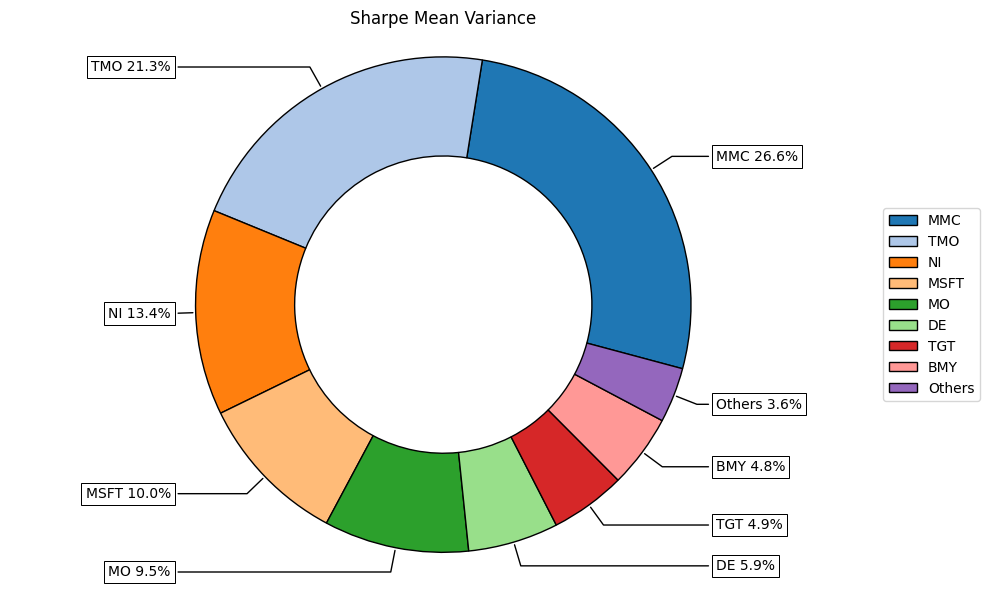

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [5]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0003%,0.0002%,6.3032%,12.1915%,0.0001%,0.0001%,17.3042%,0.0001%,0.0002%,0.0001%,...,2.4585%,0.0001%,8.3862%,0.0001%,0.0001%,5.5940%,2.9350%,0.0002%,28.9369%,0.0002%
1,0.0000%,0.0000%,0.0000%,11.4077%,0.0000%,0.0000%,14.3823%,0.7397%,0.0000%,0.0000%,...,5.7720%,0.0000%,7.9855%,0.0000%,0.0000%,5.8042%,8.2889%,0.0000%,20.1650%,0.0000%
2,0.0000%,0.0000%,0.0000%,10.7461%,0.0000%,0.0000%,12.7236%,1.4452%,0.0000%,0.0000%,...,7.1743%,0.0000%,7.7587%,0.0000%,0.0000%,5.8667%,10.1565%,0.0000%,15.1051%,0.0000%
3,0.0000%,0.0000%,0.0000%,10.2833%,0.0000%,0.0000%,11.4928%,1.9148%,0.0000%,0.0000%,...,8.2686%,0.0000%,7.5837%,0.0000%,0.0000%,5.9565%,11.5398%,0.0000%,11.1889%,0.0000%
4,0.0000%,0.0000%,0.0000%,9.8764%,0.0000%,0.0000%,10.3917%,2.3363%,0.0000%,0.0000%,...,9.2155%,0.0000%,7.3590%,0.0000%,0.0000%,6.0845%,12.6711%,0.0000%,7.9283%,0.0000%


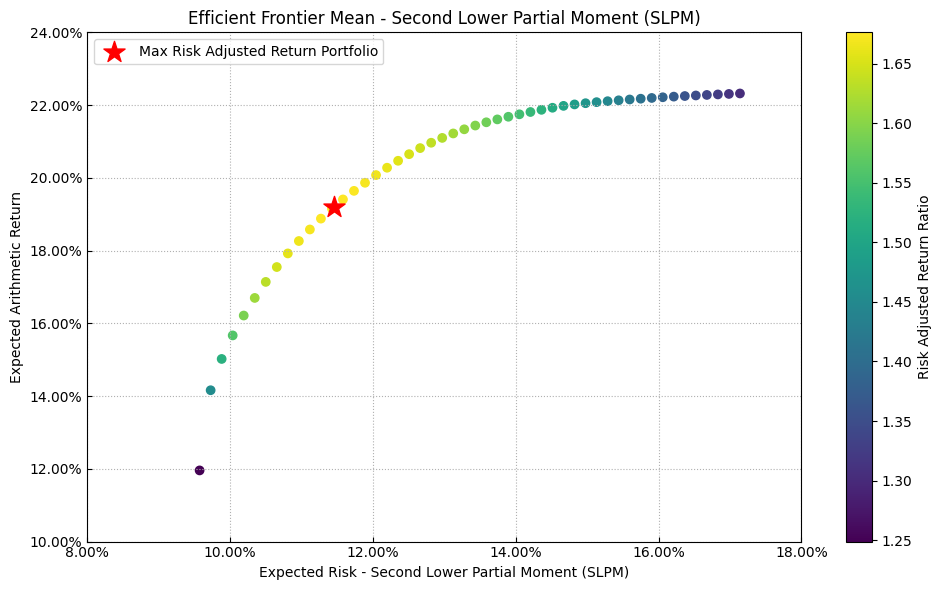

In [6]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

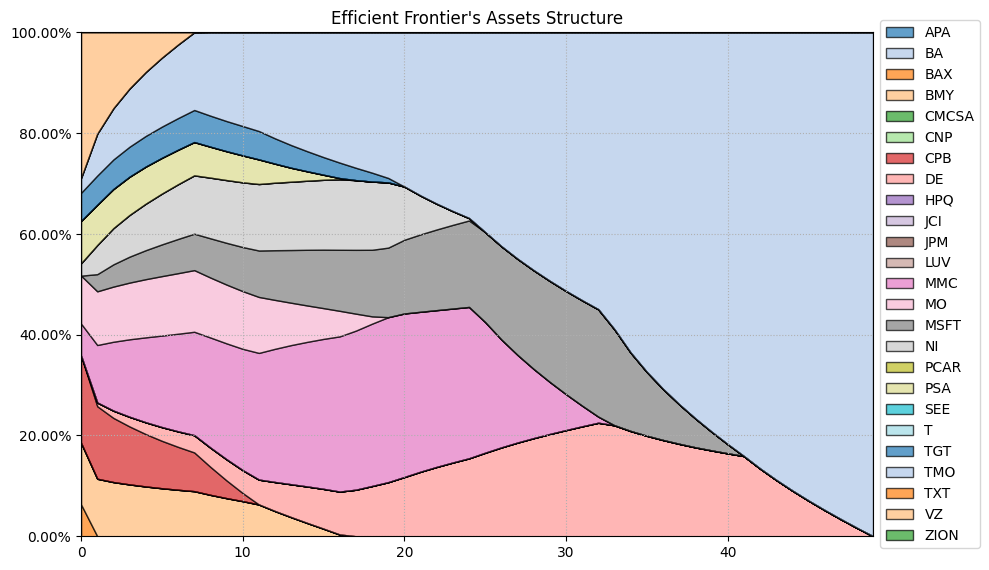

In [7]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

### Historical return analysis

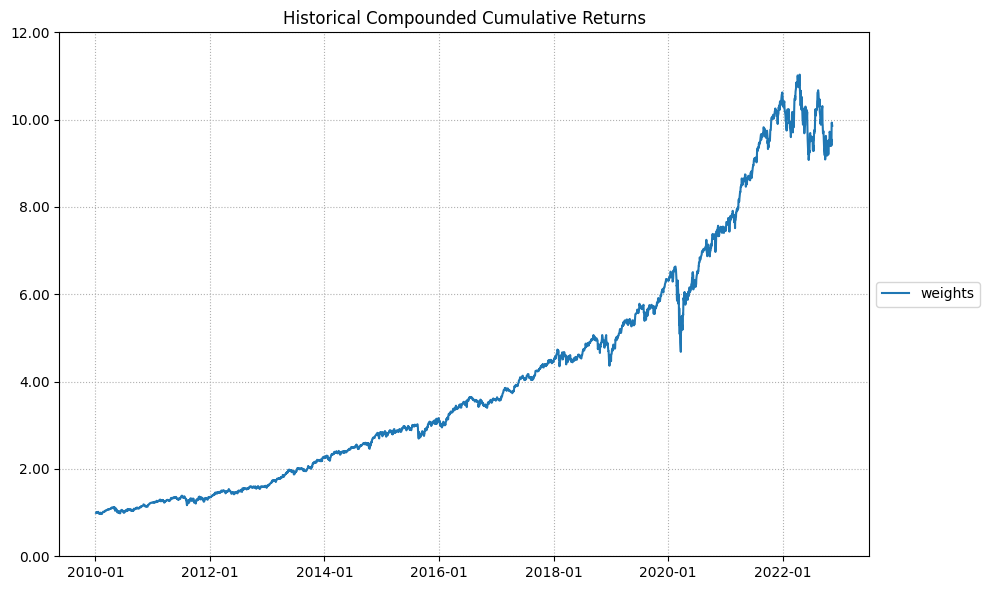

In [8]:
ws = frontier
ax = rp.plot_series(returns=Y, w=w, cmap='tab20', height=6, width=10,
                    ax=None)

### Volatility analysis

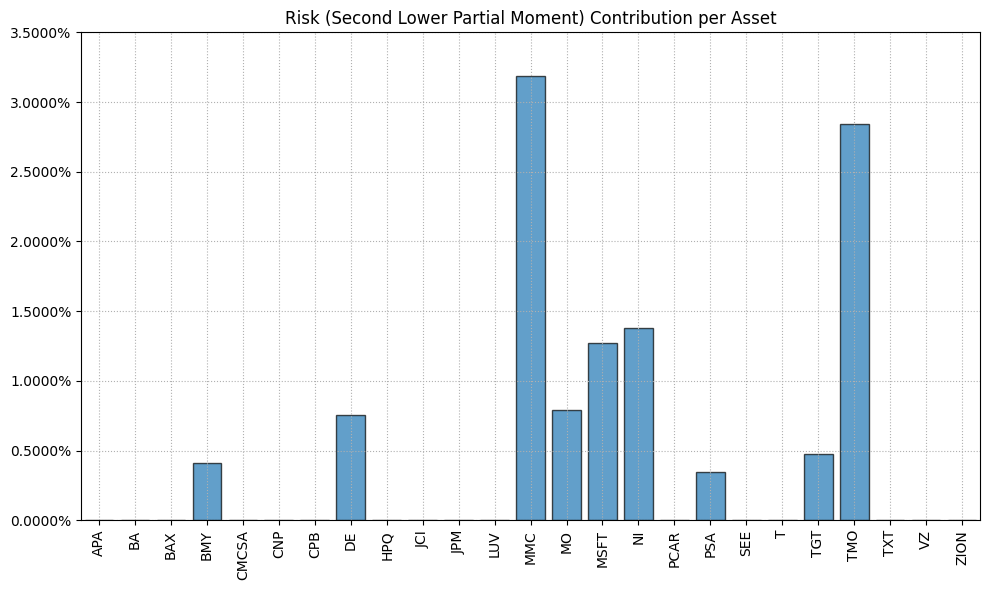

In [9]:
ax = rp.plot_risk_con(w=w, cov=cov, returns=returns, rm=rm,
                      rf=0, alpha=0.05, color="tab:blue", height=6,
                      width=10, t_factor=252, ax=None)

In [10]:
wr = pd.DataFrame()
for col, w in zip(list(Y.columns),list(w['weights'])):
    wr[col] = Y[col]*w

In [11]:
wr['Total']= wr.sum(axis=1)
Sharpe_Ratio = wr['Total'].mean()/wr['Total'].std()
Sharpe_Ratio*(252**0.5)



1.153075731824472